In [491]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Importing libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification


In [492]:
iris=pd.read_csv('C:\\Users\\USER\\Desktop\\CodeAlpha\\Iris.csv')

In [493]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [494]:
# Checking for missing values in the dataset
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [495]:
#Dropping the 'Id' column as it is not relevant for the analysis and modeling
iris.drop('Id', axis=1, inplace=True)

In [496]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [497]:
#Checking for duplicate values in the dataset
iris.duplicated().sum()

np.int64(3)

In [498]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [499]:
# Checking for data value counts in the dataset
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

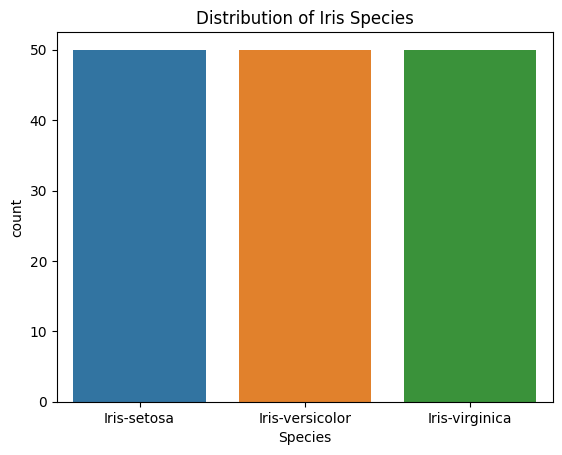

In [500]:
# Visualizing the distribution of the target variable 'Species'
sns.countplot(x='Species', data=iris, hue='Species')
plt.title('Distribution of Iris Species')
plt.show()

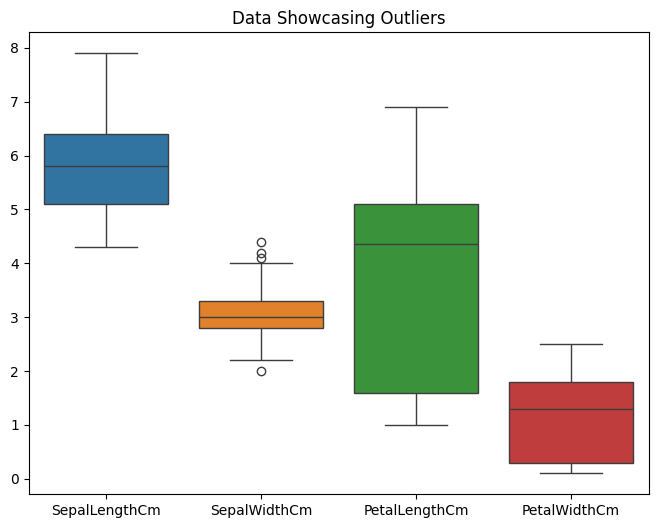

In [501]:
#Visualizing data for outliers check using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot( data=iris)
plt.title('Data Showcasing Outliers')
plt.show()


In [502]:
print('No outliers are present in the dataset as all the data points are within the whiskers of the boxplot, indicating that there are no extreme values in the dataset.')

No outliers are present in the dataset as all the data points are within the whiskers of the boxplot, indicating that there are no extreme values in the dataset.


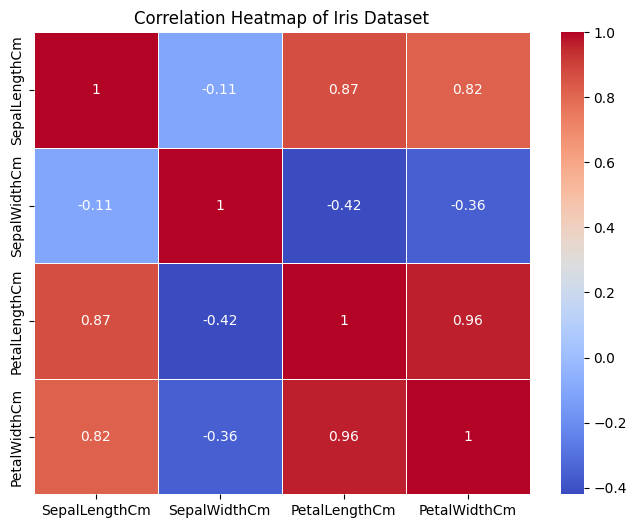

In [503]:
# Use of correletaion heatmap to check for correlation between the features
plt.figure(figsize=(8, 6))
# Selecting only numeric features for correlation analysis
numeric_features = iris.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()



In [504]:
print('Pental length and petal width have a strong positive correlation, indicating that as the petal length increases, the petal width also tends to increase. Sepal length and sepal width have a weak negative correlation, suggesting that as the sepal length increases, the sepal width tends to decrease slightly. Sepal length and petal length have a moderate positive correlation, indicating that as the sepal length increases, the petal length also tends to increase moderately. Sepal width and petal width have a weak negative correlation, suggesting that as the sepal width increases, the petal width tends to decrease slightly. Overall, these correlations provide insights into the relationships between different features in the Iris dataset.')

Pental length and petal width have a strong positive correlation, indicating that as the petal length increases, the petal width also tends to increase. Sepal length and sepal width have a weak negative correlation, suggesting that as the sepal length increases, the sepal width tends to decrease slightly. Sepal length and petal length have a moderate positive correlation, indicating that as the sepal length increases, the petal length also tends to increase moderately. Sepal width and petal width have a weak negative correlation, suggesting that as the sepal width increases, the petal width tends to decrease slightly. Overall, these correlations provide insights into the relationships between different features in the Iris dataset.


In [505]:
iris = datasets.load_iris()

In [506]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [507]:
# iris.data= feature data and iris.target= target variable
X=iris.data
Y=iris.target

In [508]:
X.shape


(150, 4)

In [509]:
Y.shape

(150,)

In [510]:
clf=RandomForestClassifier()
clf.fit(X,Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [511]:
print(clf.feature_importances_)

[0.09360186 0.02098751 0.4117115  0.47369913]


In [512]:
# The above corresponds to the importance of each feature in the dataset for the classification task. The values indicate how much each feature contributes to the model's decision-making process. Higher values suggest that the feature is more important for making accurate predictions, while lower values indicate that the feature has less influence on the model's performance. In this case, petal length and petal width are likely to be more important features for classifying the iris species compared to sepal length and sepal width.
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [513]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [514]:
X_train.shape, Y_train.shape

((120, 4), (120,))

In [515]:
X_test.shape, Y_test.shape

((30, 4), (30,))

In [516]:
clf.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [517]:
print('Model Prediction on Test Set:')
Y_pred = clf.predict(X_test)
print(Y_pred)

Model Prediction on Test Set:
[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]


In [518]:
clf.fit(iris.data, iris.target_names[iris.target])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [519]:
print(Y_test)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]


In [520]:
#Checking the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f' Test Accuracy: {accuracy:.2f}')

 Test Accuracy: 1.00


In [521]:
# Classification Report (Precision, Recall, F1-score)
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [522]:
print(len(X_train), len(X_test))
print(len(Y_train), len(Y_test))

120 30
120 30
